In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('../gp')
# import gp
# import gp.nets as nets
from legacy import Legacy
# import gp.Legacy
# import gp.Util

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/miniconda2/envs/NP/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [45]:
cnn = {}
cnn['uuid'] = 'IPMLB'
def run_dojo_xp_fp(cnn):

    # load dojo data
    input_image, input_prob, input_gold, input_rhoana, dojo_bbox = Legacy.read_dojo_data()


    original_mean_VI, original_median_VI, original_VI_s = Legacy.VI(input_gold, input_rhoana)

    # output folder for anything to store
    output_folder = '/home/d/netstatsPAPERFP/IPMLB/'
    if not os.path.exists(output_folder):
      os.makedirs(output_folder)

    # find merge errors, if we did not generate them before
    merge_error_file = output_folder+'/merges_new_cnn.p'
    merge_errors = []
    print len(merge_errors), ' merge errors found.'

    # we need to create a bigM for the dojo volume
    bigM_dojo_file = output_folder + '/bigM_fp_2D.p'
    if os.path.exists(bigM_dojo_file):
      print 'Loading dojo bigM from file..'
      with open(bigM_dojo_file, 'rb') as f:
        bigM_dojo = pickle.load(f)
#     else:
#       print 'Creating dojo bigM..'
#       bigM_dojo = gp.Legacy.create_bigM_without_mask(cnn, input_image, input_prob, input_rhoana, verbose=False)
#       with open(bigM_dojo_file, 'wb') as f:
#         pickle.dump(bigM_dojo, f)    

    print bigM_dojo[0].max()
    
    dojo_vi_95_file = output_folder + '/dojo_vi_95_t6.p'

    dojo_merge_vis = output_folder + '/dojo_merge_auto95_vis.p'
    dojo_split_vis = output_folder + '/dojo_split_auto95_vis.p'

    dojo_merge_fixes = output_folder + '/dojo_merge_auto95_fixes.p'
    dojo_split_fixes = output_folder + '/dojo_split_auto95_fixes.p'

    dojo_output_95 = output_folder + '/dojo_auto95_output.p'


    if 1:

      bigM_dojo_05 = bigM_dojo
      corrected_rhoana_05 = input_rhoana.copy()
      print 'Correcting split errors with p > .95'
      bigM_dojo_after_95, out_dojo_volume_after_auto_95, dojo_auto_fixes_95, dojo_auto_vi_s_95, vi_s_per_step2 = Legacy.splits_global_from_M_automatic(cnn, bigM_dojo_05, input_image, input_prob, corrected_rhoana_05, input_gold, sureness_threshold=.5, FP=True)

      dojo_vi_95 = Legacy.VI(input_gold, out_dojo_volume_after_auto_95)

    
      with open(dojo_vi_95_file, 'wb') as f:
        pickle.dump(dojo_vi_95, f)

      with open(dojo_split_vis, 'wb') as f:
        pickle.dump(vi_s_per_step2, f)

      with open(dojo_split_fixes, 'wb') as f:
        pickle.dump(dojo_auto_fixes_95, f)       

      with open(dojo_output_95, 'wb') as f:
        pickle.dump(out_dojo_volume_after_auto_95, f) 

    print '   Mean VI improvement', original_mean_VI-dojo_vi_95[0]
    print '   Median VI improvement', original_median_VI-dojo_vi_95[1]

    
    dojo_vi_simuser_file = output_folder + '/dojo_vi_simuser_no_t8.p'

    dojo_merge_vis = output_folder + '/dojo_merge_simuser_vis.p'
    dojo_split_vis = output_folder + '/dojo_split_simuser_vis.p'

    dojo_merge_fixes = output_folder + '/dojo_merge_simuser_fixes.p'
    dojo_split_fixes = output_folder + '/dojo_split_simuser_fixes.p'

    dojo_output_simuser = output_folder + '/dojo_simuser_output.p'

    if 1:

      #
      # perform split correction with simulated user
      #
      print 'Correcting split errors by simulated user (er=0)'
      bigM_dojo_after, out_dojo_volume_after_sim_user, dojo_sim_user_fixes, dojo_sim_user_vi_s, vi_s_per_step2 = Legacy.splits_global_from_M(cnn, bigM_dojo, input_image, input_prob, input_rhoana, input_gold, hours=.5, FP=True)

      dojo_vi_simuser = Legacy.VI(input_gold, out_dojo_volume_after_sim_user)

      with open(dojo_vi_simuser_file, 'wb') as f:
        pickle.dump(dojo_vi_simuser, f) 

      with open(dojo_split_vis, 'wb') as f:
        pickle.dump(vi_s_per_step2, f)

      with open(dojo_split_fixes, 'wb') as f:
        pickle.dump(dojo_sim_user_fixes, f)

      with open(dojo_output_simuser, 'wb') as f:
        pickle.dump(out_dojo_volume_after_sim_user, f)

    print '   Mean VI improvement', original_mean_VI-dojo_vi_simuser[0]
    print '   Median VI improvement', original_median_VI-dojo_vi_simuser[1]    


In [46]:
import numpy as np
run_dojo_xp_fp(cnn)

a
0  merge errors found.
Loading dojo bigM from file..
0.85098
Correcting split errors with p > .95
30 minutes done bigM_max= 0.552941
   Mean VI improvement -1.46607100878
   Median VI improvement -1.42596133803
Correcting split errors by simulated user (er=0)
0.419608 0.439216 0.439216
0.435294 0.431373 0.435294
0.184298 0.0 0.184298
0.509804 0.490196 0.509804
0.307451 0.4 0.4
0.388235 0.0 0.388235
0.643137 0.658823 0.658823
0.247059 0.0 0.247059
0.527489 0.686275 0.686275
0.729412 0.560646 0.729412
0.529412 0.0 0.529412
0.486274 0.0 0.486274
0.56103 0.74902 0.74902
0.513726 0.0 0.513726
0.0 0.0 0.0
0.384314 0.287858 0.384314
0.521569 0.0 0.521569
0.280215 0.0 0.280215
0.231373 0.0 0.231373
0.247059 0.278431 0.278431
0.498039 0.560784 0.560784
0.505882 0.378916 0.505882
0.462745 0.0 0.462745
0.419608 0.0 0.419608
0.494118 0.0 0.494118
0.52549 0.411765 0.52549
0.556863 0.0 0.556863
0.517647 0.705882 0.705882
0.431373 0.423529 0.431373
0.276078 0.0 0.276078
0.631373 0.0 0.631373
0.3961

In [ ]:
  def run_cylinder_xp(cnn):

    # load cylinder data
    input_image = []
    input_prob = []
    input_rhoana = []
    input_gold = []
    for z in range(250, 300):
        image, prob, mask, gold, rhoana = gp.Util.read_section('/home/d/data/cylinderNEW/', z, verbose=False)

        input_image.append(image)
        input_prob.append(255.-prob)
        input_rhoana.append(rhoana)
        input_gold.append(gold)


    original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)

    print 'Original median VI', original_median_VI

    # output folder for anything to store
    output_folder = '/home/d/netstatsPAPER/'+cnn.uuid+'/'
    if not os.path.exists(output_folder):
      os.makedirs(output_folder)






    ### SKIPPING MERGE FOR NOW
    merge_errors = []

    print len(merge_errors), ' merge errors found.'
    ####

    # we need to create a bigM for the cylinder volume
    bigM_cylinder_file = output_folder + '/bigM_cylinder.p'
    if os.path.exists(bigM_cylinder_file):
      print 'Loading cylinder bigM from file..'
      with open(bigM_cylinder_file, 'rb') as f:
        bigM_cylinder = pickle.load(f)
    else:
      print 'Creating cylinder bigM..'
      bigM_cylinder = gp.Legacy.create_bigM_without_mask(cnn, input_image, input_prob, input_rhoana, verbose=True, max=1000000)
      with open(bigM_cylinder_file, 'wb') as f:
        pickle.dump(bigM_cylinder, f)    




    print
    cylinder_vi_95_file = output_folder + '/cylinder_vi_95_w_merge.p'
    # cylinder_vi_auto_95_fixes_file = output_folder + '/cylinder_vi_95_fixes.p'
    # cylinder_auto_vis_95_file = output_folder + '/cylinder_auto_vis_95.p'


    dojo_merge_vis = output_folder + '/cylinder_merge_auto95_vis.p'
    dojo_split_vis = output_folder + '/cylinder_split_auto95_vis.p'

    dojo_merge_fixes = output_folder + '/cylinder_merge_auto95_fixes.p'
    dojo_split_fixes = output_folder + '/cylinder_split_auto95_fixes.p'

    dojo_output_95 = output_folder + '/cylinder_auto95_output.p'

    if os.path.exists(cylinder_vi_95_file):
      print 'Loading merge errors p < .05 and split errors p > .95 from file..'
      with open(cylinder_vi_95_file, 'rb') as f:
        cylinder_vi_95 = pickle.load(f)
      # with open(cylinder_auto_vis_95_file, 'rb') as f:
      #   cylinder_auto_vi_s_95 = pickle.load(f)
      # with open(cylinder_vi_auto_95_fixes_file, 'rb') as f:
      #   cylinder_auto_fixes_95 = pickle.load(f)
    else:      
      #
      # perform merge correction with p < .05
      #
      print 'Correcting merge errors with p < .05'
      bigM_cylinder_05, corrected_rhoana_05, cylinder_auto_merge_fixes, vi_s_per_step = gp.Legacy.perform_auto_merge_correction(cnn, bigM_cylinder, input_image, input_prob, input_rhoana, merge_errors, .05, input_gold=input_gold)

      print '   Mean VI improvement', original_mean_VI-gp.Legacy.VI(input_gold, corrected_rhoana_05)[0]
      print '   Median VI improvement', original_median_VI-gp.Legacy.VI(input_gold, corrected_rhoana_05)[1]

      with open(dojo_merge_vis, 'wb') as f:
        pickle.dump(vi_s_per_step, f)


      with open(dojo_merge_fixes, 'wb') as f:
        pickle.dump(cylinder_auto_merge_fixes, f) 


      #
      # perform split correction with p > .95
      #
      print 'Correcting split errors with p > .95'
      # bigM_cylinder_05 = bigM_cylinder
      # corrected_rhoana_05 = input_rhoana
      bigM_cylinder_after_95, out_cylinder_volume_after_auto_95, cylinder_auto_fixes_95, cylinder_auto_vi_s_95, vi_s_per_step2 = gp.Legacy.splits_global_from_M_automatic(cnn, bigM_cylinder_05, input_image, input_prob, corrected_rhoana_05, input_gold, sureness_threshold=.95)

      cylinder_vi_95 = gp.Legacy.VI(input_gold, out_cylinder_volume_after_auto_95)

      with open(cylinder_vi_95_file, 'wb') as f:
        pickle.dump(cylinder_vi_95, f)

      # with open(cylinder_vi_auto_95_fixes_file, 'wb') as f:
      #   pickle.dump(cylinder_auto_fixes_95, f)

      # with open(cylinder_auto_vis_95_file, 'wb') as f:
      #   pickle.dump(cylinder_auto_vi_s_95, f)        

      with open(dojo_split_vis, 'wb') as f:
        pickle.dump(vi_s_per_step2, f)

      with open(dojo_split_fixes, 'wb') as f:
        pickle.dump(cylinder_auto_fixes_95, f)       

      with open(dojo_output_95, 'wb') as f:
        pickle.dump(out_cylinder_volume_after_auto_95, f) 


    print '   Mean VI improvement', original_mean_VI-cylinder_vi_95[0]
    print '   Median VI improvement', original_median_VI-cylinder_vi_95[1]







    # print
    # cylinder_vi_0_file = output_folder + '/cylinder_vi_0.p'
    # cylinder_vi_auto_0_fixes_file = output_folder + '/cylinder_vi_0_fixes.p'
    # cylinder_auto_vis_0_file = output_folder + '/cylinder_auto_vis_0.p'    
    # if os.path.exists(cylinder_vi_0_file):
    #   print 'Loading split errors p >= .0 from file..'
    #   with open(cylinder_vi_0_file, 'rb') as f:
    #     cylinder_vi_0 = pickle.load(f)
    #   with open(cylinder_vi_auto_0_fixes_file, 'rb') as f:
    #     cylinder_auto_fixes_00 = pickle.load(f)
    #   with open(cylinder_auto_vis_0_file, 'rb') as f:
    #     cylinder_auto_vi_s_00 = pickle.load(f)


    # else:      
    #   # #
    #   # # perform merge correction with p < .01
    #   # #
    #   # print 'Correcting merge errors with p < .01'
    #   # bigM_dojo_05, corrected_rhoana_05 = gp.Legacy.perform_auto_merge_correction(cnn, bigM_dojo, input_image, input_prob, input_rhoana, merge_errors, .05)

    #   # print '   Mean VI improvement', original_mean_VI-gp.Legacy.VI(input_gold, corrected_rhoana_05)[0]
    #   # print '   Median VI improvement', original_median_VI-gp.Legacy.VI(input_gold, corrected_rhoana_05)[1]

    #   #
    #   # perform split correction with p > .99
    #   #
    #   print 'Correcting split errors with p >= .0'
    #   bigM_cylinder_00 = bigM_cylinder
    #   corrected_rhoana_00 = input_rhoana
    #   bigM_cylinder_after_00, out_cylinder_volume_after_auto_00, cylinder_auto_fixes_00, cylinder_auto_vi_s_00 = gp.Legacy.splits_global_from_M_automatic(cnn, bigM_cylinder_00, input_image, input_prob, corrected_rhoana_00, input_gold, sureness_threshold=.0)

    #   cylinder_vi_0 = gp.Legacy.VI(input_gold, out_cylinder_volume_after_auto_00)

    #   with open(cylinder_vi_0_file, 'wb') as f:
    #     pickle.dump(cylinder_vi_0, f)

    #   with open(cylinder_vi_auto_0_fixes_file, 'wb') as f:
    #     pickle.dump(cylinder_auto_fixes_00, f)

    #   with open(cylinder_auto_vis_0_file, 'wb') as f:
    #     pickle.dump(cylinder_auto_vi_s_00, f)      

    # print '   Mean VI improvement', original_mean_VI-cylinder_vi_0[0]
    # print '   Median VI improvement', original_median_VI-cylinder_vi_0[1]



    print
    cylinder_vi_simuser_file = output_folder + '/cylinder_vi_simuser_final.p'
    # cylinder_fixes_simuser_file = output_folder + '/cylinder_fixes_simuser.p'
    # cylinder_vis_simuser_file = output_folder + '/cylinder_vi_s_simuser.p'


    dojo_merge_vis = output_folder + '/cylinder_merge_simuser_vis.p'
    dojo_split_vis = output_folder + '/cylinder_split_simuser_vis.p'

    dojo_merge_fixes = output_folder + '/cylinder_merge_simuser_fixes.p'
    dojo_split_fixes = output_folder + '/cylinder_split_simuser_fixes.p'

    dojo_output_simuser = output_folder + '/cylinder_simuser_output.p'    
    if os.path.exists(cylinder_vi_simuser_file):
      print 'Loading merge errors and split errors (simulated user) from file..'
      with open(cylinder_vi_simuser_file, 'rb') as f:
        cylinder_vi_simuser = pickle.load(f)
      # with open(cylinder_fixes_simuser_file, 'rb') as f:
      #   cylinder_sim_user_fixes = pickle.load(f)
      # with open(cylinder_vis_simuser_file, 'rb') as f:
      #   cylinder_sim_user_vi_s = pickle.load(f)


    else:
      # #
      # # perform merge correction with simulated user
      # #
      print 'Correcting merge errors by simulated user (er=0)'
      bigM_cylinder_simuser, corrected_rhoana_sim_user, sim_user_fixes, vi_s_per_step = gp.Legacy.perform_sim_user_merge_correction(cnn, bigM_cylinder, input_image, input_prob, input_rhoana, input_gold, merge_errors)
      
      print '   Mean VI improvement', original_mean_VI-gp.Legacy.VI(input_gold, corrected_rhoana_sim_user)[0]    
      print '   Median VI improvement', original_median_VI-gp.Legacy.VI(input_gold, corrected_rhoana_sim_user)[1]
      
      with open(dojo_merge_vis, 'wb') as f:
        pickle.dump(vi_s_per_step, f)


      with open(dojo_merge_fixes, 'wb') as f:
        pickle.dump(sim_user_fixes, f)

      #
      # perform split correction with simulated user
      #
      print 'Correcting split errors by simulated user (er=0)'
      # bigM_cylinder_simuser = bigM_cylinder
      # corrected_rhoana_sim_user = input_rhoana
      bigM_cylinder_after, out_cylinder_volume_after_sim_user, cylinder_sim_user_fixes, cylinder_sim_user_vi_s, vi_s_per_step2 = gp.Legacy.splits_global_from_M(cnn, bigM_cylinder_simuser, input_image, input_prob, corrected_rhoana_sim_user, input_gold, hours=-1)

      cylinder_vi_simuser = gp.Legacy.VI(input_gold, out_cylinder_volume_after_sim_user)

      with open(cylinder_vi_simuser_file, 'wb') as f:
        pickle.dump(cylinder_vi_simuser, f)      

      # with open(cylinder_vis_simuser_file, 'wb') as f:
      #   pickle.dump(cylinder_sim_user_vi_s, f)

      # with open(cylinder_fixes_simuser_file, 'wb') as f:
      #   pickle.dump(cylinder_sim_user_fixes, f)
      with open(dojo_split_vis, 'wb') as f:
        pickle.dump(vi_s_per_step2, f)

      with open(dojo_split_fixes, 'wb') as f:
        pickle.dump(cylinder_sim_user_fixes, f)

      with open(dojo_output_simuser, 'wb') as f:
        pickle.dump(out_cylinder_volume_after_sim_user, f)


    print '   Mean VI improvement', original_mean_VI-cylinder_vi_simuser[0]
    print '   Median VI improvement', original_median_VI-cylinder_vi_simuser[1]



In [24]:
with open('/home/d/netstatsPAPERFP/IPMLB/dojo_simuser_output.p', 'rb') as f:
    simuser_out = pickle.load(f)

In [25]:
simuser_out.shape

(10, 474, 474)

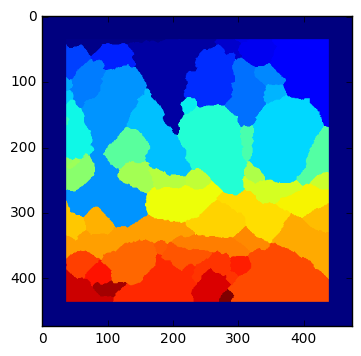

In [30]:
imshow(simuser_out[9])

In [18]:
cnn.uuid = 'IPMLB'

AttributeError: 'dict' object has no attribute 'uuid'